In [7]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [26]:
# matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, figsize = (5,4))
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [4]:
# configure matplotlib for high images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [5]:
# load the dataset
data_dir = Path("../input/dl-course-data/")
red_wine = pd.read_csv(data_dir / "red-wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# create training and validation splits
df_train = red_wine.sample(frac = 0.7, random_state = 0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [9]:
display(df_valid.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
23,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.9968,3.17,0.53,9.4,5


In [10]:
red_wine.shape

(1599, 12)

In [15]:
# split features and target
X_train = red_wine.drop('quality', axis = 1)
X_valid = red_wine.drop('quality', axis = 1)
y_train = red_wine.quality
y_valid = red_wine.quality

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
        layers.Dense(units = 1024, activation = 'relu', input_shape= [11]),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(units = 1024, activation = 'relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(units = 1024, activation = 'relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1),
])

In [23]:
model.compile(optimizer = 'adam', loss = 'mae')

In [24]:
history = model.fit(
            X_train,y_train,
            batch_size = 256,
            epochs = 100,
            validation_data = (X_valid, y_valid),
            verbose = 0,
)

Text(0, 0.5, 'Loss')

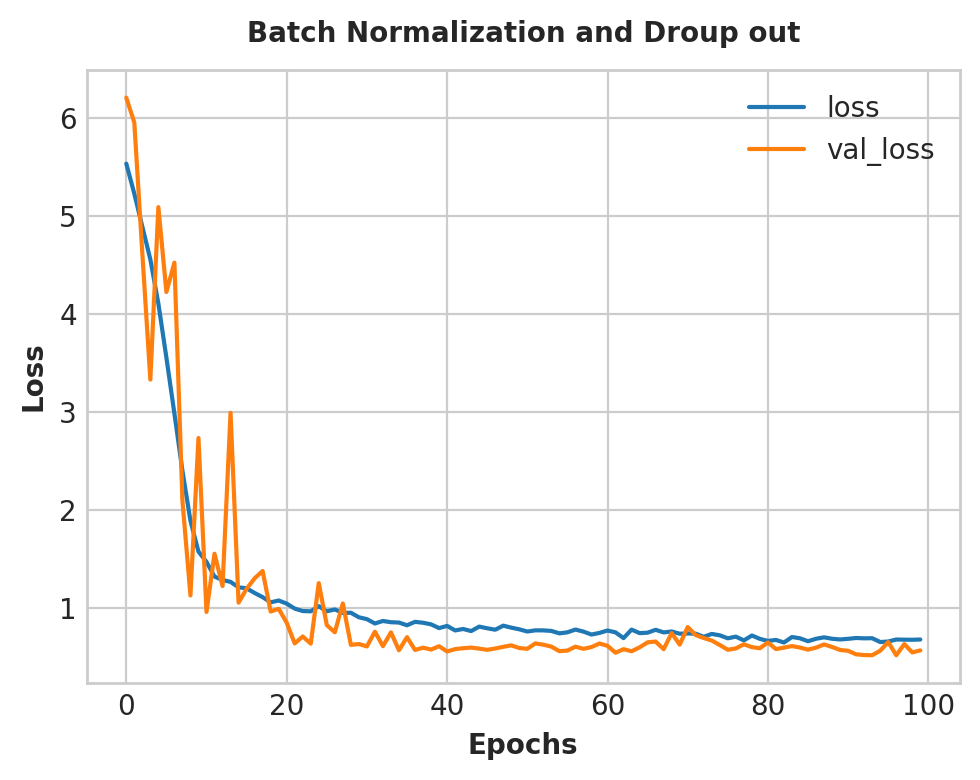

In [28]:
# show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.title('Batch Normalization and Droup out')
plt.xlabel('Epochs')
plt.ylabel('Loss')